# Sympy: Trabalhando com Símbolos Matemáticos

**SymPy** oferece recursos para cálculos matemáticos simbólicos no Python, de maneira semelhante ao que é possível com programas como Mathematica ou Maple. A principal diferença é que o SymPy funciona como qualquer outro módulo Python, permitindo que você combine a matemática simbólica com as funcionalidades do Python em seus projetos. Além disso, enquanto o Python é uma plataforma de código aberto, o Mathematica é uma ferramenta proprietária, embora, na minha opinião, o Mathematica ainda se mantenha mais robusto em termos de capacidade.

Para começar a usar, a seguinte importação, juntamente com a função `init_session()`, configura um ambiente conveniente, ideal para trabalhar com o SymPy dentro do Jupyter.

In [1]:
from sympy import init_session
init_session(use_latex="mathjax")

IPython console for SymPy 1.12 (Python 3.11.7-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [2]:
import math

## Tipos do SymPy e manipulação simbólica básica


O SymPy utiliza tipos próprios para representar seus objetos matemáticos. Embora seja possível converter esses tipos para os tipos nativos do Python, essa prática não é recomendada na maioria das vezes, pois pode resultar em uma perda de precisão.

In [7]:
print(sqrt(2))

sqrt(2)


In [6]:
print(sqrt(8))

2*sqrt(2)


In [5]:
print(2**0.5)

1.4142135623730951


In [6]:
#help(sqrt(8))

No SymPy, não estamos limitados a cálculos com números. Podemos definir expressões simbólicas, informando ao SymPy quais elementos devem ser tratados como símbolos, por meio da função `symbols()`.

In [9]:
from sympy import symbols
x, y, z = symbols("x y z")

In [10]:
expr = x + 2*y
expr

x + 2⋅y

In [11]:
expr - 1

x + 2⋅y - 1

In [12]:
expr - y

x + y

In [13]:
f = x*expr
f

x⋅(x + 2⋅y)

In [14]:
g = expand(f)
g

 2        
x  + 2⋅x⋅y

In [15]:
factor(g)

x⋅(x + 2⋅y)

## Substituição

Com o SymPy, é possível substituir valores por símbolos em expressões simbólicas. Contudo, o seguinte provavelmente não irá gerar o comportamento esperado:

In [23]:
w = symbols("w")
expr = sin(w*2*pi)
w = 0
expr

sin(2⋅π⋅w)

Agora, redefinimos `z` para ser um tipo do Python

In [24]:
type(w)

int

A substituição é feita utilizando o método `subs()` (equivalente ao comando `./` no Mathematica).

In [25]:
expr = sin(x*2*pi)
expr

sin(2⋅π⋅x)

In [26]:
a = expr.subs(x, 0.125)
a

√2
──
2 

Observe que o valor ainda não é um número de ponto flutuante — ele continua sendo um objeto do SymPy. Para convertê-lo para ponto flutuante, podemos utilizar o método `evalf()`.


In [27]:
b = a.evalf()
print(b, type(b))

0.707106781186548 <class 'sympy.core.numbers.Float'>


Ainda estamos lidando com um objeto do SymPy, uma vez que o SymPy permite cálculos com precisão arbitrária.

In [28]:
a.evalf(50)

0.70710678118654752440084436210484903928483593768847

Está buscando pelos tipos padrão do Python?

In [29]:
c = float(b)
print(c, type(c))

0.7071067811865476 <class 'float'>


## Python e sympy

In [30]:
x, y, z, t = symbols('x y z t')

Os símbolos do Sympy são apenas objetos, e quando você realiza operações com dois objetos do Sympy, o resultado é também um objeto do Sympy.

Quando você combina um objeto do Sympy com um objeto do Python, o resultado também será um objeto do Sympy.

No entanto, devemos ter cuidado ao trabalhar com frações. Por exemplo, ao fazer `x + 1/3`, primeiro o Python calculará `1/3` (resultando em `0.333...`) e depois adicionará isso ao símbolo `x` do Sympy. A função `Rational()` faz com que tudo isso aconteça dentro do Sympy.


In [31]:
f = expr + Rational(1,3)
f

sin(2⋅π⋅x) + 1/3

In [32]:
expr + 1/3

sin(2⋅π⋅x) + 0.333333333333333

## Igualdade

O operador `=` continua sendo o operador de atribuição em Python (não representando igualdade simbólica), enquanto `==` verifica a igualdade lógica (ou seja, a comparação exata de estruturas). Para definir igualdade simbólica, usamos o objeto `Eq()`.

Além disso, quando se trata de verificar a _igualdade algébrica_, o operador `==` não é adequado, pois ele verifica a _igualdade estrutural_, não levando em consideração a equivalência algébrica.

In [33]:
x + 1 == 4

False

In [34]:
Eq(x + 1, 4)

x + 1 = 4

In [35]:
a = (x + 1)**2
b = x**2 + 2*x + 1    # these are algebraically equal

In [36]:
a == b

False

In [37]:
Eq(a,b) # That's not enough...

       2    2          
(x + 1)  = x  + 2⋅x + 1

A função `simplify()` pode ser utilizada para verificar a igualdade algébrica.

In [38]:
simplify(a - b)

0

In [39]:
a = cos(x) + I*sin(x)
a

ⅈ⋅sin(x) + cos(x)

In [40]:
simplify(a)

 ⅈ⋅x
ℯ   

## Substituições adicionais

É importante notar que a substituição gera uma nova expressão, pois as expressões no Sympy são imutáveis.

In [39]:
expr = cos(x)
expr.subs(x, 0)

1

In [40]:
expr

cos(x)

In [41]:
x

x

Se precisar realizar várias substituições, basta passar uma lista de tuplas.

In [42]:
expr = x**3 + 4*x*y - z
expr

 3            
x  + 4⋅x⋅y - z

In [43]:
expr.subs([(x, 2), (y, 4), (z, 0)])

40

# Simplicando Expressões

Não há uma definição única de qual é a forma mais simples de uma expressão.

O método `simplify()` utiliza diversos métodos para tentar simplificar a expressão (veja a documentação para mais informações).

In [41]:
simplify(sin(x)**2 + cos(x)**2)

1

In [42]:
simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

x - 1

No entanto, em alguns casos, ele pode não corresponder à sua noção de qual é a forma mais simples.

In [45]:
simplify(x**2 + 2*x + 1)

 2          
x  + 2⋅x + 1

Talvez o que você precise seja o método *factor* (o que também ocorre no Mathematica).

In [46]:
factor(x**2 + 2*x + 1)

       2
(x + 1) 

### Simplificação de Polinômios

Para simplificar polinômios utilizamos a função `expand`

In [48]:
expand((x + 1)**2)

 2          
x  + 2⋅x + 1

In [49]:
expand((x + 2)*(x - 3))

 2        
x  - x - 6

In [50]:
expand( (x + 1)*(x - 2) - (x - 1)*x)

-2

In [51]:
expr = x**2*z + 4*x*y*z + 4*y**2*z
expr

 2                  2  
x ⋅z + 4⋅x⋅y⋅z + 4⋅y ⋅z

In [52]:
factor(expr)

           2
z⋅(x + 2⋅y) 

A função `collect()` no SymPy é usada para agrupar termos semelhantes de uma expressão algébrica. Ela permite combinar termos com potências iguais de uma variável, facilitando a simplificação de expressões.

In [54]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

 3    2        2              
x  - x ⋅z + 2⋅x  + x⋅y + x - 3

In [55]:
collected_expr = collect(expr, x)
collected_expr

 3    2                        
x  + x ⋅(2 - z) + x⋅(y + 1) - 3

A função `cancel()` do SymPy é usada para simplificar expressões algébricas, cancelando fatores comuns entre o numerador e o denominador de uma fração racional. Isso é útil quando você tem frações algébricas e deseja simplificar a expressão removendo termos comuns.

In [64]:
a = (x**2 + 2*x + 1)/(x**2 + x)
a

 2          
x  + 2⋅x + 1
────────────
    2       
   x  + x   

In [65]:
cancel(a)

x + 1
─────
  x  

A função `trigsimp()` do SymPy é usada para simplificar expressões trigonométricas. Ela aplica uma série de identidades trigonométricas para tentar simplificar a expressão, como a combinação de funções trigonométricas equivalentes ou a aplicação de identidades comuns, como a identidade de Pitágoras.

In [56]:
expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
expr

   4           2       2         4   
sin (x) - 2⋅sin (x)⋅cos (x) + cos (x)

In [57]:
trigsimp(expr)

cos(4⋅x)   1
──────── + ─
   2       2

In [58]:
trigsimp(sin(x)*tan(x)/sec(x))

   2   
sin (x)

# Resolvendo operações de Cálculo Diferencial e Integral

As operações de cálculo são fáceis de realizar no sympy

### Derivadas


Para derivar alguma função utilizamos o comando `diff`

In [59]:
diff(cos(x), x)

-sin(x)

In [60]:
diff(exp(x**2), x)

     ⎛ 2⎞
     ⎝x ⎠
2⋅x⋅ℯ    

No caso de aplicarmos derivada de ordens superiores, adicionamos um terceiro arumento referente a ordem. No exemplo abaixo calculamos a derivada de terceira ordem

In [73]:
diff(x**4, x, 3)

24⋅x

Podemos também fazer derivadas em relação a diversas variaveis.

O comando `diff(expr, x, y, z)` calcula a derivada de expr em relação a $x$, $y$, e $y$, primeiro em relação a $x$, depois em relação a $y$, e, por último, em relação a $z$, ou seja,

$$\frac{\partial^3}{\partial z \partial y \partial x } (\text{expr})$$

In [74]:
expr = exp(x*y*z)
diff(expr, x, y, z)

⎛ 2  2  2              ⎞  x⋅y⋅z
⎝x ⋅y ⋅z  + 3⋅x⋅y⋅z + 1⎠⋅ℯ     

que é equivalente a

In [77]:
diff(diff(diff(expr, x),y),z)

 2  2  2  x⋅y⋅z            x⋅y⋅z    x⋅y⋅z
x ⋅y ⋅z ⋅ℯ      + 3⋅x⋅y⋅z⋅ℯ      + ℯ     

Se quisermos trabalhar com o valor simbolico colocar o D maiúsculo

In [78]:
deriv = Derivative(expr, x, y, z)
deriv

    3           
   ∂    ⎛ x⋅y⋅z⎞
────────⎝ℯ     ⎠
∂z ∂y ∂x        

No entanto, se for possível resolver de forma analítica a partir da expressão simbolica usamos o `doit

In [80]:
deriv.doit()

⎛ 2  2  2              ⎞  x⋅y⋅z
⎝x ⋅y ⋅z  + 3⋅x⋅y⋅z + 1⎠⋅ℯ     

### Integrais

São suportadas tanto integrais definidas quanto indefinidas. Podemos achar somente a primitiva usando o comando `integrate`

In [81]:
integrate(cos(x), x)

sin(x)

Para adicionar limites de integração basta trocar a variavel de integração $x$ por $(x,0,\infty)$

In [82]:
integrate(exp(-x), (x, 0, oo))

1

Para realizar integrais duplas fazemos o procedimento acima duas vezes

In [61]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

π

Se preferir, pode apenas deixar a integral denotada simbolicamente

In [84]:
expr = integrate(x**x, x)
print(expr)
expr

Integral(x**x, x)


⌠      
⎮  x   
⎮ x  dx
⌡      

### Limites

Para evoluir o limite de uma função, utilizamos `limit`, sendo que:

- O primeiro argumento sendo a função
- O segundo argumento sendo a variavel que irá tender a algo.
- O terceiro o valor que o segundo argumento irá tender

In [62]:
limit(sin(x)/x, x, 0)

1

### Expansão de Séries

Podemos realizar a expansão em série de Taylor de Funções utilizando o comando `.series`. Os argumentos são:

- Expressão que queremos expandir
- Em torno de qual valor estamos realizando a expansão
- Qual ordem queremos truncar a série

In [89]:
expr = exp(sin(x))
a = expr.series(x, 0, 10)
a

         2    4    5     6    7       8     9          
        x    x    x     x    x    31⋅x     x      ⎛ 10⎞
1 + x + ── - ── - ── - ─── + ── + ───── + ──── + O⎝x  ⎠
        2    8    15   240   90    5760   5670         

Podemos especificar o segundo e o terceiro termo usando,  `x0=` e `n=`

In [63]:
c = log(x).series(x, x0=1, n=6)
c

            2          3          4          5                         
     (x - 1)    (x - 1)    (x - 1)    (x - 1)         ⎛       6       ⎞
-1 - ──────── + ──────── - ──────── + ──────── + x + O⎝(x - 1) ; x → 1⎠
        2          3          4          5                             

Poemos remover o simbolo das ordens superiores utilizando `.remove`

In [64]:
c.removeO()

           5          4          3          2    
    (x - 1)    (x - 1)    (x - 1)    (x - 1)     
x + ──────── - ──────── + ──────── - ──────── - 1
       5          4          3          2        

e até mesmo simplificar tal expressão

In [91]:
simplify(c.removeO())

 5      4       3                   
x    5⋅x    10⋅x       2         137
── - ──── + ───── - 5⋅x  + 5⋅x - ───
5     4       3                   60

# Encontrando Soluções

O Sympy tem diversas ferramentas para encontrar a soluções de equações, sistemas, EDO, etc de forma simbólica.


### Equações

O `solveset` é uma função do SymPy utilizada para encontrar soluções de equações etc de forma simbólica. 

Antigamente, a função utilizada era `solve()`, mas ela foi substituída (veja mais em http://docs.sympy.org/latest/modules/solvers/solveset.html).

A sintaxe é

``solveset(equação, variável)``

No exemplo abaixo tentamos buscar o conjunto solução da equação $x^2-x=4$, que para denota-lá usamos `Eq(x**2 - x,4)`

In [66]:
solveset(Eq(x**2 - x,4), x)

⎧1   √17  1   √17⎫
⎨─ - ───, ─ + ───⎬
⎩2    2   2    2 ⎭

Se `Eq()` não for utilizado, assume-se que a equação é igual a 0.

In [67]:
solveset(x**2 - x, x)

{0, 1}

A função `solveset` no **SymPy** permite restringir as soluções de uma equação a um determinado domínio. Os principais domínios de restrição são:

1. **`S.Reals`**: 
   - Restringe as soluções aos números reais.
   - Exemplo: Encontrar soluções reais para uma equação.

2. **`S.Integers`**: 
   - Restringe as soluções aos números inteiros.
   - Exemplo: Encontrar soluções inteiras para uma equação.

3. **`S.Complexes`**: 
   - Restringe as soluções aos números complexos.
   - Este é o comportamento padrão se nenhum domínio for especificado.
   - Exemplo: Encontrar soluções complexas para uma equação.

4. **`Interval`**:
   - Restringe as soluções a um intervalo específico.
   - Você pode definir um intervalo com a função `sp.Interval(inicio, fim)`, onde `inicio` e `fim` são os limites do intervalo.
   - Exemplo: Encontrar soluções de uma equação dentro do intervalo [0, 3].


In [68]:
solveset(sin(x) - 1, x, domain=S.Reals)

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

em que o conjunto Z representa os inteiros.

O `root` é um método do SymPy que permite encontrar a raiz de uma equação ou expressão simbólica. Ele é mais usaddo para encontrar raízes diretas de polinômios simples, enqual o `solveset` para equações gerais com maior flexibilidade e controle sobre o domínio.

In [ ]:
solveset(x**3 - 6*x**2 + 9*x, x)

{0, 3}

In [ ]:
roots(x**3 - 6*x**2 + 9*x, x)

{0: 1, 3: 2}

O número 0 representa uma raiz única, enquanto o número 3 indica duas raízes que coincidem.


### Sistemas Lineares

O `linsolve()` é uma função do SymPy utilizada para encontrar soluções de sistemas de equações lineares de forma simbólica. 

Sua sintaxe é:

`linsolve([expr1, expr2], [variavel1, variavel2])`

In [102]:
linsolve([x - y + 2, x + y - 3], [x, y])

{(1/2, 5/2)}

In [103]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

{(-y - 1, y, 2)}

### Equações Diferenciais

É necessário ter uma função indefinida (f e g já estão definidas como indefinidas por meio da nossa `init_session()` mencionada acima, mas é provável que já tenhamos reiniciado essas funções).


In [110]:
f, g = symbols('f g', cls=Function)

Assim

In [111]:
f(x)

f(x)

Para termos a derivida de $f$ fazemos

In [112]:
f(x).diff(x)

d       
──(f(x))
dx      

Consequentemos podemos escrever uma equação usando derivadas

In [114]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

In [115]:
diffeq

                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                

Tais equações envolvendo derivadas ordinárias são chamadas de EDO (equações diferencias ordinárias) e para resolve-las o Sympy tem a função `dsolve`

In [116]:
dsolve(diffeq, f(x))

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   

### Matrizes

Considere uma matriz qualquer

$$
A = \left ( \begin{array}{ccc} u  & p    & 0 \\                          
                                  0  &  u       & 1/p\\                     
                                  0  & c^2 p & u \end{array} \right ) $$


Vamos trabalhar com a matriz de Vandermonde para exemplificar

Para definir a mariz usamos o comando `Matrix`, mas antes precisamos especificar os simbolos que vamos utilizar usando `symbols`

In [99]:
p, u, c = symbols('p u c')
A = Matrix([[u, p, 0], [0, u, p**-1], [0, c**2 * p, u]])
A

⎡u   p    0⎤
⎢          ⎥
⎢         1⎥
⎢0   u    ─⎥
⎢         p⎥
⎢          ⎥
⎢    2     ⎥
⎣0  c ⋅p  u⎦

Caso quisessemos letras gregas precisariamos importar ela diretamente de `sympy.ab`, utilizando o comando:

``from sympy.abc import `` + letra

In [113]:
from sympy.abc import rho, alpha
p, u, c = symbols('rho alpha c')
A = Matrix([[u, p, 0], [0, u, p**-1], [0, c**2 * p, u]])
A

⎡α   ρ    0⎤
⎢          ⎥
⎢         1⎥
⎢0   α    ─⎥
⎢         ρ⎥
⎢          ⎥
⎢    2     ⎥
⎣0  c ⋅ρ  α⎦

In [102]:
A.row(0)

[α  ρ  0]

The eigenvalues of the system are the speeds at which information propagates

In [103]:
A.eigenvals()

{α: 1, α - c: 1, α + c: 1}

A diagonalização (ou decomposição espectral) de uma matriz quadrada $A$ é dada por:
$$ A = PDP^{-1}$$
onde $P$ é a matriz dos autovetores e $D$ a matriz dos autovalores.

Podemos obter tais matrizes utilizando `.diagonalize`

In [104]:
P, D = A.diagonalize()

Assim, $D$ irá fornecer uma matriz diagonal cujos elementos são os autovalores de $A$.

In [87]:
D

⎡0  0       0     ⎤
⎢                 ⎥
⎢0  0       0     ⎥
⎢                 ⎥
⎢       4    2    ⎥
⎣0  0  x  + x  + 1⎦

Enquanto $P$ a matriz cujas colunas são os autovetores de $A$.

In [88]:
P

⎡      2  1 ⎤
⎢-x  -x   ──⎥
⎢          2⎥
⎢         x ⎥
⎢           ⎥
⎢         1 ⎥
⎢1    0   ─ ⎥
⎢         x ⎥
⎢           ⎥
⎣0    1   1 ⎦

Além disso, podemos calcula a inversa de $A$ utilizando `**-1`

In [114]:
A**-1

⎡1      ρ           -1      ⎤
⎢─  ─────────   ─────────── ⎥
⎢α     2    2      3      2 ⎥
⎢   - α  + c    - α  + α⋅c  ⎥
⎢                           ⎥
⎢      -α            1      ⎥
⎢0  ─────────  ─────────────⎥
⎢      2    2     2      2  ⎥
⎢   - α  + c   - α ⋅ρ + c ⋅ρ⎥
⎢                           ⎥
⎢       2                   ⎥
⎢      c ⋅ρ          α      ⎥
⎢0  ─────────     ───────   ⎥
⎢      2    2      2    2   ⎥
⎣   - α  + c      α  - c    ⎦

ou usando o comando `.inv()`

In [119]:
A.inv()

⎡1      ρ           -1      ⎤
⎢─  ─────────   ─────────── ⎥
⎢α     2    2      3      2 ⎥
⎢   - α  + c    - α  + α⋅c  ⎥
⎢                           ⎥
⎢      -α            1      ⎥
⎢0  ─────────  ─────────────⎥
⎢      2    2     2      2  ⎥
⎢   - α  + c   - α ⋅ρ + c ⋅ρ⎥
⎢                           ⎥
⎢       2                   ⎥
⎢      c ⋅ρ          α      ⎥
⎢0  ─────────     ───────   ⎥
⎢      2    2      2    2   ⎥
⎣   - α  + c      α  - c    ⎦

Além disso ele faz operações de multiplicação apenas utilizando o comando `*`

In [127]:
C = A**-1
A * C


⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Usando o `simplify`, obtemos a matriz A

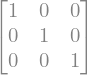

In [130]:
simplify(A*C)

```{tabbed} Exercício
Verifique que $PDP^{-1}$ resulta em $A$
```

```{tabbed} Solução
```python
C = P**-1

P * D * C

```

# Exercicios: Sympy

In [ ]:
import sympy as sym
from sympy import init_session
init_session()

1. Crie a expressão:

    $$f = x e^{-x} + x (1-x)$$

    Em seguida, avalie-a para

    $$x = 0, 0.1, 0.2, 0.4, 0.8$$

In [ ]:
pass

2. Fatore o seguinte polinômio

    $$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

    Em seguida, encontre suas raízes.

3. Integre a função:

    $$f = \sin(x) e^{-x}$$

    Em seguida, diferencie o resultado para verificar se você retorna à função original.

4. Escreva um programa que leia uma expressão matemática como uma string (por exemplo, `"sin(2*pi*x)"`), converta-a para uma expressão do sympy e então avalie conforme necessário.

    Faça com que seu programa gere um gráfico da função inserida.
    
    Dica, utilize a função `parse_expr()` converte uma string em uma expressão do SymPy e a função `sympy.lambdify()` converte uma expressão do SymPy em uma função que pode ser chamada pelo Python(Você também pode torná-la compatível com o numpy, o que significa, por exemplo, que qualquer `sin()` na sua expressão do SymPy será avaliada usando `np.sin()`).

In [133]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [130]:
s = "sin(2*pi*x)"
a = parse_expr(s) # Converte uma string em uma expressão do SymPy
print(a)

f = lambdify(x, a, "numpy") # Converte uma expressão do SymPy em uma função
print(f(1.0))

sin(2⋅π⋅x)